In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
dataframe = pd.read_csv('bikes.csv')
dataframe

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129


In [3]:
#getting the profit for registerred 
dataframe['registered_profit'] = dataframe['registered'] * 5
dataframe

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,registered_profit
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,65
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,160
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,135
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,50
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1645
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1155
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,820
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,585


<AxesSubplot:xlabel='registered_profit', ylabel='Count'>

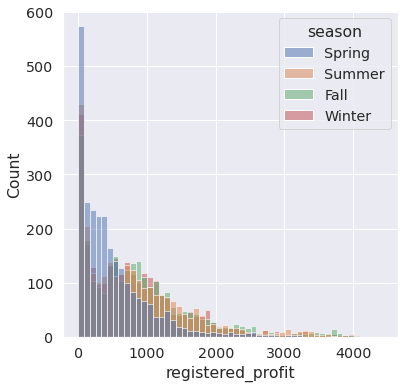

In [17]:
sns.histplot(x=dataframe['registered_profit'], color='b', hue=dataframe.season)

<AxesSubplot:xlabel='season', ylabel='registered_profit'>

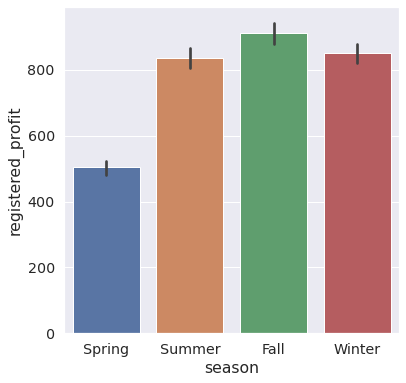

In [24]:
sns.barplot(data=dataframe, x='season',y='registered_profit')

<AxesSubplot:xlabel='registered_profit', ylabel='Density'>

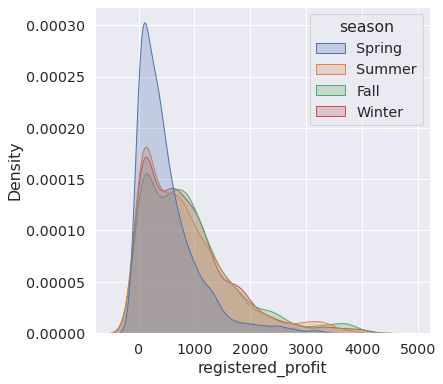

In [15]:
sns.set(rc={'figure.figsize': [6, 6]}, font_scale=1.3)
sns.kdeplot(x=dataframe['registered_profit'], color='b', shade=True, hue=dataframe.season)

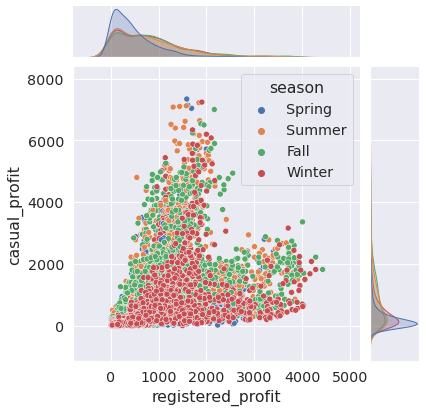

In [32]:
#`kind` must be one of ['scatter', 'hist', 'hex', 'kde', 'reg', 'resid']
#profit for casual and registered for every season
# we notice that it is highest in fall and lowest in winter
sns.jointplot(x='registered_profit', y='casual_profit', data=dataframe, hue='season', kind='scatter')

<AxesSubplot:xlabel='casual_profit', ylabel='Density'>

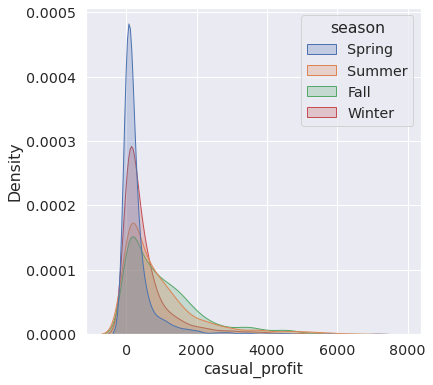

In [18]:
#getting casual profit
dataframe['casual_profit'] = dataframe['casual'] * 20
dataframe
sns.kdeplot(x=dataframe['casual_profit'], color='b', shade=True, hue=dataframe.season)

<AxesSubplot:xlabel='season', ylabel='casual_profit'>

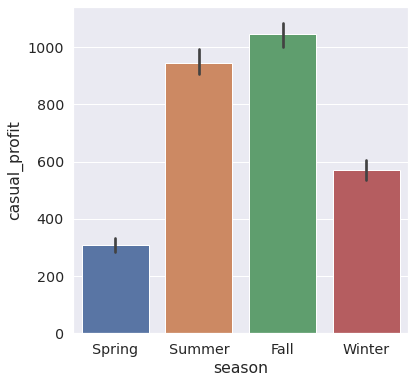

In [23]:
sns.barplot(data=dataframe, x='season',y='casual_profit')

In [45]:
#getting taxes and representing  it
dataframe['Taxes'] = (dataframe['casual_profit'] + dataframe['registered_profit']) * 0.0014 

# dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            10886 non-null  object 
 1   season              10672 non-null  object 
 2   holiday             10030 non-null  float64
 3   workingday          9388 non-null   float64
 4   weather             8746 non-null   object 
 5   temp                8104 non-null   float64
 6   humidity            7462 non-null   float64
 7   windspeed           6820 non-null   float64
 8   casual              10886 non-null  int64  
 9   registered          10886 non-null  int64  
 10  rented_bikes_count  10886 non-null  int64  
 11  registered_profit   10886 non-null  int64  
 12  casual_profit       10886 non-null  int64  
 13  Taxes               10886 non-null  float64
dtypes: float64(6), int64(5), object(3)
memory usage: 1.2+ MB


<AxesSubplot:xlabel='season', ylabel='Taxes'>

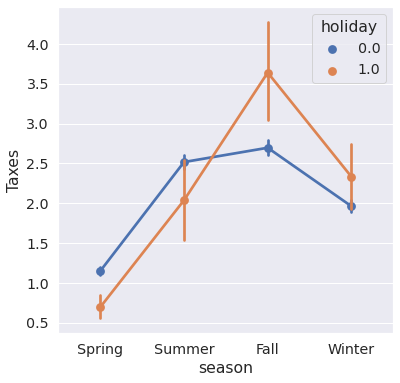

In [51]:
# sns.catplot(x='Taxes')
dataframe.info()
sns.pointplot(x='season', y='Taxes', data=dataframe, hue='holiday')

In [13]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            10886 non-null  object 
 1   season              10672 non-null  object 
 2   holiday             10030 non-null  float64
 3   workingday          9388 non-null   float64
 4   weather             8746 non-null   object 
 5   temp                8104 non-null   float64
 6   humidity            7462 non-null   float64
 7   windspeed           6820 non-null   float64
 8   casual              10886 non-null  int64  
 9   registered          10886 non-null  int64  
 10  rented_bikes_count  10886 non-null  int64  
 11  registered_profit   10886 non-null  int64  
 12  casual_profit       10886 non-null  int64  
 13  Taxes               10886 non-null  float64
dtypes: float64(6), int64(5), object(3)
memory usage: 1.2+ MB


In [56]:
dataframe['datetime'] = pd.to_datetime(dataframe.datetime, format='%Y-%m-%d %H:%M:%S')

In [57]:
dataframe['datetime'].dt.year.unique()

array([2011, 2012])

(array([4284., 2337., 1686., 1067.,  633.,  426.,  233.,  116.,   85.,
          19.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <BarContainer object of 10 artists>)

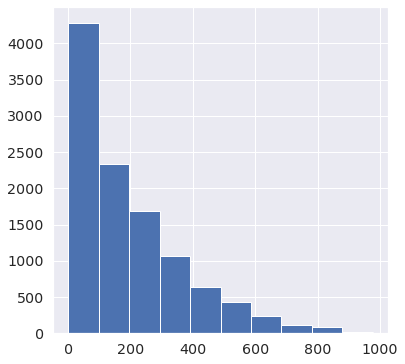

In [58]:
plt.hist(x=dataframe['rented_bikes_count'])

(array([5099., 2342., 1557.,  804.,  507.,  278.,  180.,   68.,   39.,
          12.]),
 array([5.000e+00, 9.210e+02, 1.837e+03, 2.753e+03, 3.669e+03, 4.585e+03,
        5.501e+03, 6.417e+03, 7.333e+03, 8.249e+03, 9.165e+03]),
 <BarContainer object of 10 artists>)

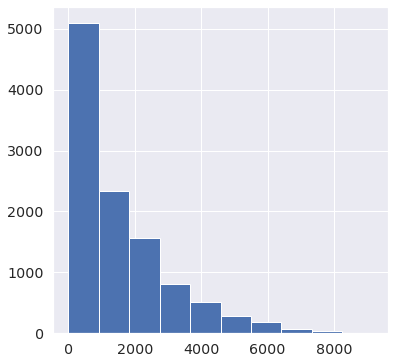

In [59]:
dataframe['profit'] = dataframe['casual_profit'] + dataframe['registered_profit']
plt.hist(dataframe['profit'])

In [82]:
#Profit for each day.
df = pd.pivot_table(dataframe, index=[dataframe['datetime'].dt.year, dataframe['datetime'].dt.month], columns= dataframe['datetime'].dt.day, values = 'profit')
df

datetime                    1            2            3            4   \
datetime datetime                                                       
2011     1          412.083333   259.565217   388.409091   410.000000   
         2          326.304348   362.916667   376.739130   428.695652   
         3          471.250000   588.958333   427.916667   538.750000   
         4          655.833333  1030.416667  1708.750000  1107.708333   
         5         1409.375000  1446.250000  1304.166667   707.916667   
         6         1148.541667  1495.000000  1667.916667  2281.041667   
         7         1895.833333  2443.958333  2394.791667  3174.583333   
         8         1344.375000  1510.000000  1036.458333  1452.708333   
         9         1555.000000  1531.666667  2143.541667  2604.791667   
         10         806.041667   992.916667   950.000000  1232.083333   
         11        1103.750000  1103.333333  1026.666667  1136.666667   
         12         890.208333   988.333333  1194.166667  1122.291667   
2012     1          906.666667   583.260870   521.458333   552.708333   
         2         1143.958333   902.291667  1058.541667   830.000000   
         3         1242.708333   819.166667  1444.583333  1156.875000   
         4         2725.416667  2078.260870  2253.333333  2002.083333   
         5         1603.958333  1702.083333  1815.208333  1979.791667   
         6         1192.916667  3438.541667  3150.625000  2127.291667   
         7         2040.416667  1862.291667  2045.000000  3143.541667   
         8         2250.416667  2127.083333  2324.791667  2887.291667   
         9         2749.166667  2843.541667  2485.208333  1971.875000   
         10        1888.958333  1163.333333  2032.500000  2083.541667   
         11        1538.333333  1604.375000  1713.541667  1814.583333   
         12        1675.833333  1526.041667  1645.625000  1720.625000   

datetime                    5            6            7            8   \
datetime datetime                                                       
2011     1          401.304348   406.521739   424.782609   242.291667   
         2          271.875000   559.375000   431.666667   358.750000   
         3          832.708333   205.869565   566.086957   641.875000   
         4          478.333333   843.125000  1011.250000   413.958333   
         5         1307.291667  1518.750000  1989.583333  1778.333333   
         6         2075.208333  1368.125000  1483.750000  1339.375000   
         7         1616.250000  1454.375000  1427.916667  1274.166667   
         8         1653.125000  1845.208333  1599.791667  1430.000000   
         9         1470.625000   722.173913   489.583333   500.217391   
         10        1354.791667  1392.083333  1631.666667  2523.750000   
         11        1540.416667  1355.208333  1073.750000  1111.041667   
         12         939.583333   619.166667   178.125000   785.833333   
2012     1          769.166667  1045.625000  1610.625000  1087.916667   
         2          812.708333   956.956522  1035.833333   651.875000   
         3          821.250000   962.291667  1294.166667  1425.000000   
         4         2090.208333  2475.208333  3461.041667  2470.625000   
         5         2993.958333  2659.166667  1936.875000  1654.583333   
         6         2063.541667  2111.666667  2210.000000  2541.666667   
         7         2178.333333  2146.875000  1913.333333  1725.208333   
         8         2205.208333  2231.666667  2313.958333  2358.958333   
         9         2001.666667  1674.166667  2216.458333  2218.125000   
         10        2646.666667  3553.750000  1219.375000  1687.500000   
         11        1331.875000  1475.833333  1252.708333  1377.173913   
         12        1400.416667  1332.291667  1261.458333  1883.541667   

datetime                    9            10           11           12  \
datetime datetime                                                       
2011     1          205.000000   300.833333   316.363636

In [93]:
#Which season that has more registeration &amp; profit.
df = dataframe.groupby('season')[['profit', 'registered']].mean().sort_values(['profit', 'registered'], ascending=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Fall to Spring
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   profit      4 non-null      float64
 1   registered  4 non-null      float64
dtypes: float64(2)
memory usage: 96.0+ bytes


/home/mohazab/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'estimator'
  cset = contour_func(


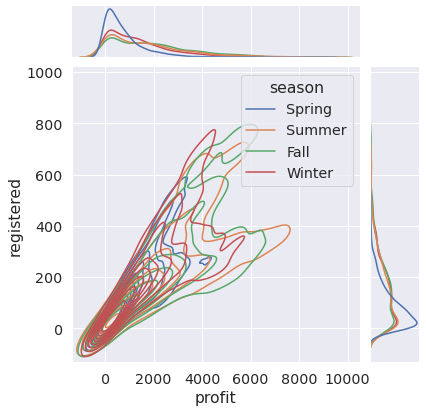

In [114]:
sns.jointplot(data= dataframe , x='profit', y ='registered',hue='season', estimator=np.mean , kind='kde')

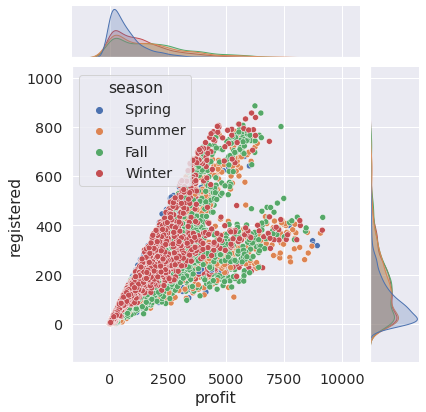

In [115]:
sns.jointplot(data= dataframe , x='profit', y ='registered',hue='season', estimator=np.mean , kind='scatter')

In [49]:
# Which weather condition that has more registeration &amp; profit.
dataframe.groupby('weather')[['profit', 'registered']].mean().profit.sort_values(ascending=False)

weather
Clear    1618.571552
Mist     1361.843736
Snowy     910.000000
Rainy     855.266955
Name: profit, dtype: float64

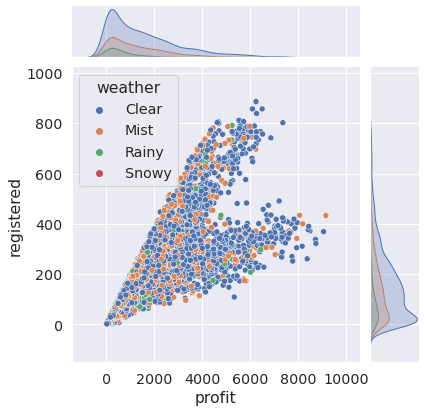

In [129]:
sns.jointplot(data=dataframe, x='profit', y='registered', hue='weather', dropna=True)

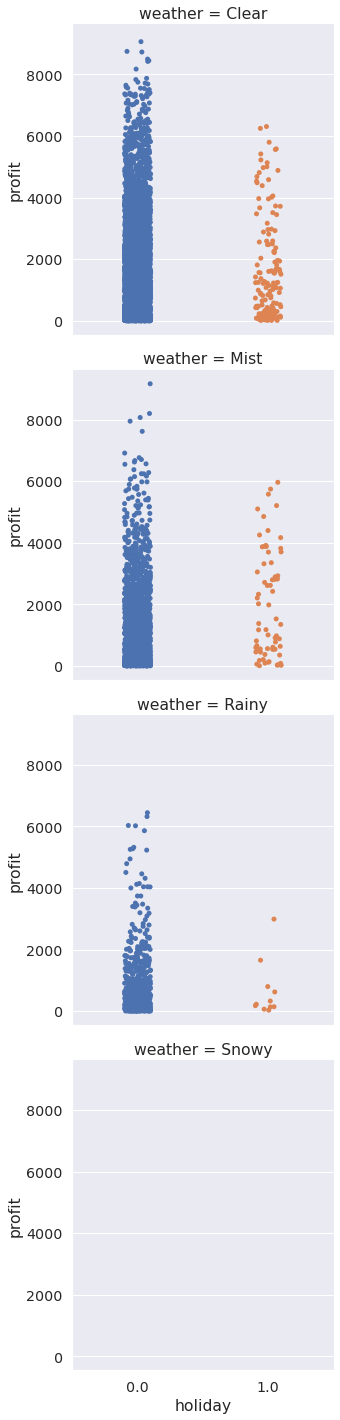

In [134]:
sns.catplot(data=dataframe, x= 'holiday', y= 'profit', row='weather', kind='strip')

<AxesSubplot:xlabel='weather', ylabel='registered'>

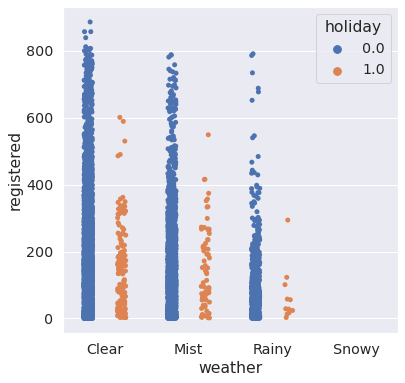

In [121]:
sns.stripplot(data=dataframe, x='weather', y='registered', hue='holiday', dodge=True)

In [37]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            10886 non-null  datetime64[ns]
 1   season              10672 non-null  object        
 2   holiday             10030 non-null  float64       
 3   workingday          9388 non-null   float64       
 4   weather             8746 non-null   object        
 5   temp                8104 non-null   float64       
 6   humidity            7462 non-null   float64       
 7   windspeed           6820 non-null   float64       
 8   casual              10886 non-null  int64         
 9   registered          10886 non-null  int64         
 10  rented_bikes_count  10886 non-null  int64         
 11  registered_profit   10886 non-null  int64         
 12  casual_profit       10886 non-null  int64         
 13  Taxes               10886 non-null  float64   

In [160]:
# Correlation between profit &amp; bikes count with all features.
dataframe[['profit', 'rented_bikes_count']].corr()

,profit,rented_bikes_count
profit,1.00000,0.93449
rented_bikes_count,0.93449,1.00000


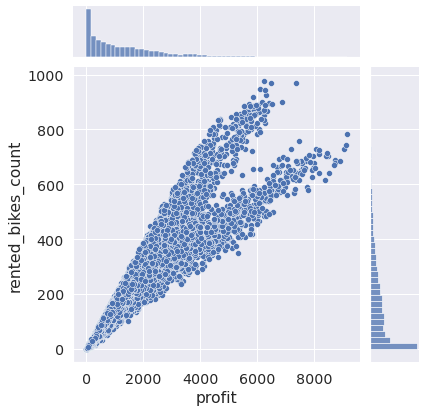

In [163]:
sns.jointplot(x='profit', y='rented_bikes_count', data=dataframe)

<AxesSubplot:>

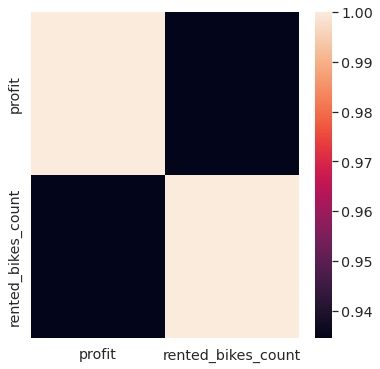

In [169]:
sns.heatmap(dataframe[['profit', 'rented_bikes_count']].corr())

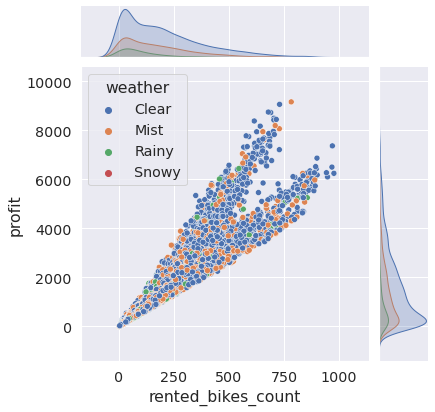

In [149]:
sns.jointplot(x='rented_bikes_count', y='profit', data=dataframe, hue='weather', estimator=dataframe.corr)

In [76]:
df_rental = pd.pivot_table(dataframe, index=[dataframe['datetime'].dt.year, dataframe['datetime'].dt.month, dataframe['datetime'].dt.day], columns= dataframe['datetime'].dt.hour, values = 'rented_bikes_count')

In [80]:
# Rentals during rush hours (7-9 am &amp; 3-5 pm).
df_rental

datetime                       0     1     2     3     4     5      6      7   \
datetime datetime datetime                                                      
2011     1        1          16.0  40.0  32.0  13.0   1.0   1.0    2.0    3.0   
                  2          17.0  17.0   9.0   6.0   3.0   NaN    2.0    1.0   
                  3           5.0   2.0   NaN   NaN   1.0   3.0   30.0   64.0   
                  4           5.0   2.0   1.0   NaN   2.0   4.0   36.0   94.0   
                  5           6.0   6.0   2.0   NaN   2.0   3.0   33.0   88.0   
...                           ...   ...   ...   ...   ...   ...    ...    ...   
2012     12       15         94.0  95.0  69.0  23.0   6.0   3.0   11.0   48.0   
                  16        110.0  96.0  87.0  38.0  11.0   9.0    6.0   27.0   
                  17         28.0  15.0   5.0   3.0   5.0  24.0  108.0  319.0   
                  18         18.0  15.0   7.0   5.0   8.0  36.0  118.0  355.0   
                  19         41.0  15.0   3.0   5.0   7.0  31.0  112.0  363.0   

datetime                       8      9   ...     14     15     16     17  \
datetime datetime datetime                ...                               
2011     1        1           8.0   14.0  ...  106.0  110.0   93.0   67.0   
                  2           8.0   20.0  ...   59.0   74.0   76.0   65.0   
                  3         154.0   88.0  ...   77.0   72.0   76.0  157.0   
                  4         179.0  100.0  ...   63.0   65.0   83.0  212.0   
                  5         195.0  115.0  ...   62.0   62.0   89.0  190.0   
...                           ...    ...  ...    ...    ...    ...    ...   
2012     12       15        119.0  220.0  ...  426.0  447.0  413.0  309.0   
                  16         88.0  132.0  ...  310.0  338.0  400.0  243.0   
                  17        592.0  282.0  ...  181.0  211.0  302.0  495.0   
                  18        662.0  326.0  ...  247.0  246.0  363.0  572.0   
                  19        678.0  317.0  ...  218.0  237.0  334.0  562.0   

datetime                       18     19     20     21     22     23  
datetime datetime datetime                                            
2011     1        1          35.0   37.0   36.0   34.0   28.0   39.0  
                  2          53.0   30.0   22.0   31.0    9.0    8.0  
                  3         157.0  110.0   52.0   52.0   20.0   12.0  
                  4         182.0  112.0   54.0   48.0   35.0   11.0  
                  5         169.0  132.0   89.0   43.0   42.0   19.0  
...                           ...    ...    ...    ...    ...    ...  
2012     12       15        272.0  257.0  201.0  184.0  156.0  119.0  
                  16        107.0  109.0  122.0  106.0   89.0   33.0  
                  17        507.0  340.0  200.0  120.0   54.0   47.0  
                  18        525.0  353.0  268.0  168.0  132.0   81.0  
                  19        569.0  336.0  241.0  168.0  129.0   88.0  

[456 rows x 24 columns]

In [91]:
df_rental.loc[:, 7:9].sum(axis = 1, skipna = True)

datetime  datetime  datetime
2011      1         1             25.0
                    2             29.0
                    3            306.0
                    4            373.0
                    5            398.0
                                 ...  
2012      12        15           387.0
                    16           247.0
                    17          1193.0
                    18          1343.0
                    19          1358.0
Length: 456, dtype: float64

In [90]:
df_rental.loc[:, 3:5].sum(axis = 1, skipna = True)

datetime  datetime  datetime
2011      1         1           15.0
                    2            9.0
                    3            4.0
                    4            6.0
                    5            5.0
                                ... 
2012      12        15          32.0
                    16          58.0
                    17          32.0
                    18          49.0
                    19          43.0
Length: 456, dtype: float64

In [97]:
# Rentals during workday &amp; holiday.
dataframe['workingday'].unique()

array([ 0., nan,  1.])

In [102]:
dataframe[dataframe['workingday'] == 1.0]['rented_bikes_count'].describe()

count    6367.000000
mean      192.613162
std       184.815639
min         1.000000
25%        41.000000
50%       150.000000
75%       276.000000
max       970.000000
Name: rented_bikes_count, dtype: float64

In [98]:
df_work_holiday = pd.pivot_table(dataframe, index=[dataframe['datetime'].dt.year, dataframe['datetime'].dt.month, dataframe['datetime'].dt.day], columns= dataframe[['workingday', 'holiday']], values = 'rented_bikes_count')
df_work_holiday

workingday                         0.0             1.0
holiday                            0.0 1.0         0.0
datetime datetime datetime                            
2011     1        1          39.052632 NaN         NaN
                  2          38.888889 NaN         NaN
                  3                NaN NaN   62.473684
                  4                NaN NaN   60.571429
                  5                NaN NaN   72.950000
...                                ...  ..         ...
2012     12       15        193.050000 NaN         NaN
                  16        161.850000 NaN         NaN
                  17               NaN NaN  178.761905
                  18               NaN NaN  239.578947
                  19               NaN NaN  231.388889

[456 rows x 3 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            10886 non-null  datetime64[ns]
 1   season              10672 non-null  object        
 2   holiday             10030 non-null  float64       
 3   workingday          9388 non-null   float64       
 4   weather             8746 non-null   object        
 5   temp                8104 non-null   float64       
 6   humidity            7462 non-null   float64       
 7   windspeed           6820 non-null   float64       
 8   casual              10886 non-null  int64         
 9   registered          10886 non-null  int64         
 10  rented_bikes_count  10886 non-null  int64         
 11  registered_profit   10886 non-null  int64         
 12  casual_profit       10886 non-null  int64         
 13  Taxes               10886 non-null  float64   

<AxesSubplot:xlabel='holiday', ylabel='rented_bikes_count'>

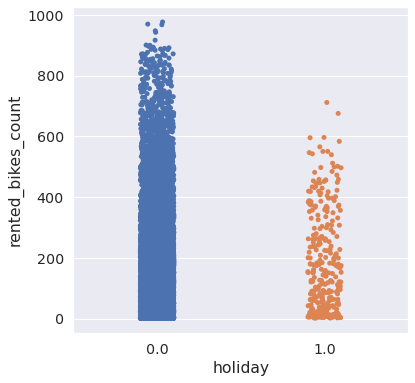

In [176]:
dataframe.info()
sns.stripplot(x='holiday', y= 'rented_bikes_count', data=dataframe)

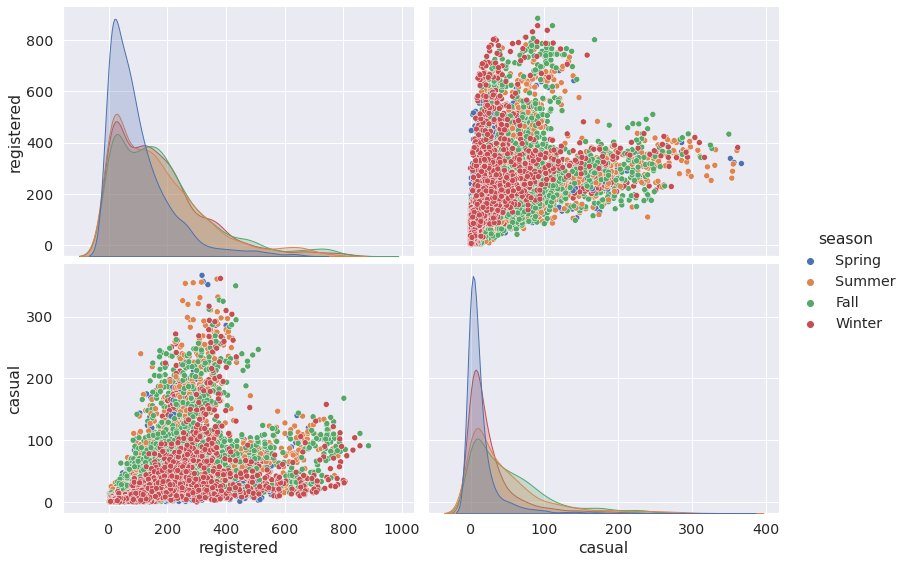

In [184]:
# Registered or casual is more.
dataframe['registered_vs_casual'] =dataframe['registered'] > dataframe['casual'] 
sns.pairplot(dataframe,vars=['registered','casual'],height=4,aspect=1.4,hue='season')


In [109]:
# What is the average of bikes would be registered during the week.
dataframe[(dataframe['workingday'] == 1.0) | ((dataframe['holiday'] == 1.0))]['rented_bikes_count'].describe()

count    6659.000000
mean      192.295540
std       184.048545
min         1.000000
25%        40.000000
50%       150.000000
75%       277.000000
max       970.000000
Name: rented_bikes_count, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              10886 non-null  datetime64[ns]
 1   season                10672 non-null  object        
 2   holiday               10030 non-null  float64       
 3   workingday            9388 non-null   float64       
 4   weather               8746 non-null   object        
 5   temp                  8104 non-null   float64       
 6   humidity              7462 non-null   float64       
 7   windspeed             6820 non-null   float64       
 8   casual                10886 non-null  int64         
 9   registered            10886 non-null  int64         
 10  rented_bikes_count    10886 non-null  int64         
 11  registered_profit     10886 non-null  int64         
 12  casual_profit         10886 non-null  int64         
 13  Taxes           

<AxesSubplot:xlabel='workingday', ylabel='rented_bikes_count'>

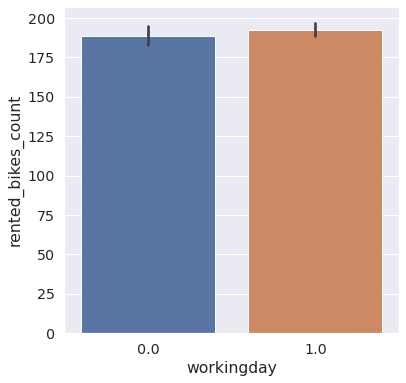

In [187]:
dataframe.info()
sns.barplot(data=dataframe, x='workingday', y= 'rented_bikes_count', estimator=np.mean)

In [106]:
dataframe

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,registered_profit,casual_profit,Taxes,profit,registered_vs_casual
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,65,60,0.175,125,True
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,160,160,0.448,320,True
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,135,100,0.329,235,True
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,50,60,0.154,110,True
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,5,0,0.007,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1645,140,2.499,1785,True
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1155,200,1.897,1355,True
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,820,80,1.260,900,True
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,585,240,1.155,825,True


In [ ]:
# Schools (9-12) &amp; (2-6) profit.
# could not understand the question????

In [114]:
# Profit in 2011 &amp; saturdays &amp; season fall
dataframe[dataframe['datetime'].dt.year == 2011]['profit'].sum()

6247150

<AxesSubplot:xlabel='datetime', ylabel='profit'>

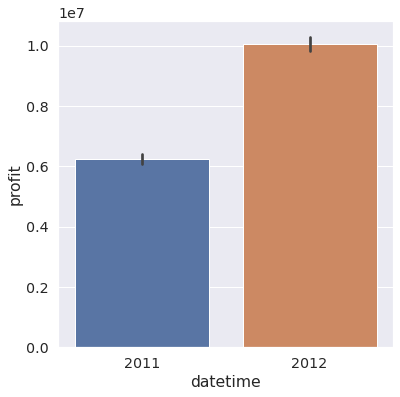

In [190]:
sns.barplot(data=dataframe, x=dataframe['datetime'].dt.year, y='profit', estimator = sum)

In [115]:
dataframe[dataframe['holiday'] == 1.0]['profit'].sum()

482305

<AxesSubplot:xlabel='holiday', ylabel='profit'>

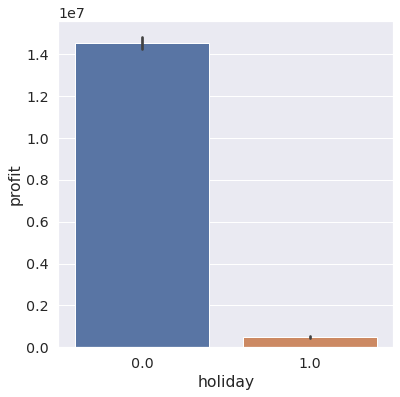

In [188]:
sns.barplot(data=dataframe, x='holiday', y='profit', estimator = sum)

In [118]:
dataframe[dataframe['season'] == 'Fall']['profit'].sum()

5243900

<AxesSubplot:xlabel='season', ylabel='profit'>

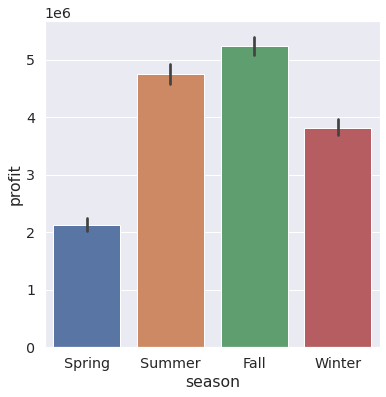

In [189]:
sns.barplot(data=dataframe, x='season', y='profit', estimator = sum)